# This ipynb will read out GOES Satellite data. It specifically reads out the Electron flux data.

In [74]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
matplotlib.rc('font', size=16)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

In [16]:
#Loading the files of 2006:
file06 = pd.read_csv('ProtonDec06.csv', skiprows=454)
#File structure:
elec1 = file06['e1_flux_ic'].values # Electron integral flux > 0.6 MeV corrected unreliable during ion storms.
elec2 = file06['e2_flux_ic'].values # Electron integral flux > 2.0 MeV corrected unreliable during ion storms.
elec3 = file06['e3_flux_ic'].values # Electron integral flux > 4.0 MeV corrected unreliable during ion storms.


In [31]:
#Loading the files of 2017:
file17 = pd.read_csv('ElectronsSept17.csv', skiprows=381)
#File structure:
elec1E = file17['E1E_COR_FLUX'].values
elec1W = file17['E1W_COR_FLUX'].values
#Average flux of electrons with energy >.8 MeV from the B detector that faces either East or West depending 
#on the yaw flip of the satellite with a correction applied to remove proton contamination
elec2E = file17['E2E_COR_FLUX'].values
elec2W = file17['E2W_COR_FLUX'].values
#Average flux of electrons with energy >2 MeV from the B detector that faces either East or West depending 
#on the yaw flip of the satellite with a correction applied to remove proton contamination
elec3E = file17['E3E_COR_FLUX'].values
elec3W = file17['E3W_COR_FLUX'].values
#Average flux of electrons with energy >4 MeV from the B detector that faces either East or West depending 
#on the yaw flip of the satellite with a correction applied to remove proton contamination

AvgE1 = (elec1E+elec1W)/2
AvgE2 = (elec2E+elec2W)/2
AvgE3 = (elec3E+elec3W)/2 

In [45]:
#This part will transform the timestamps into a datetime object.
time06 = file06['time_tag']
time17 = file17['time_tag']
larray2 = len(time06)
larray = len(time17)
Time = []
Time06 = []
for i in range(0,larray2):
    temp2 = datetime.strptime(time06.values[i],'%Y-%m-%d %H:%M:%S.%f')
    Time06.append(temp2)
    
for i in range(0,larray):
    temp = datetime.strptime(time17.values[i], '%Y-%m-%d %H:%M:%S.%f')
    Time.append(temp)

# Now all the data has been loaded, we can create the plots

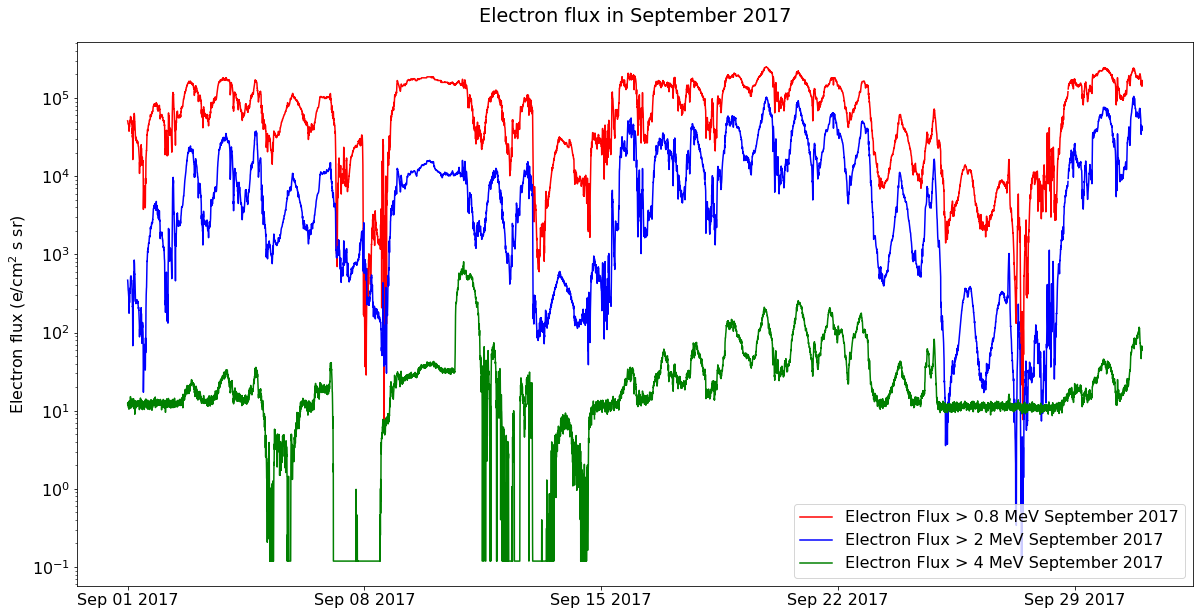

In [75]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
e2017 = plt.semilogy(Time,AvgE1,color='r',label="Electron Flux > 0.8 MeV September 2017")
e22017 = plt.semilogy(Time,AvgE2,color='b',label="Electron Flux > 2 MeV September 2017")
e32017 = plt.semilogy(Time,AvgE3,color='g',label="Electron Flux > 4 MeV September 2017")
ax.set_title('Electron flux in September 2017')
ax.set_ylabel('Electron flux (e/cm$^2$ s sr)')
plt.legend(handles=[e2017[0],e22017[0],e32017[0]])


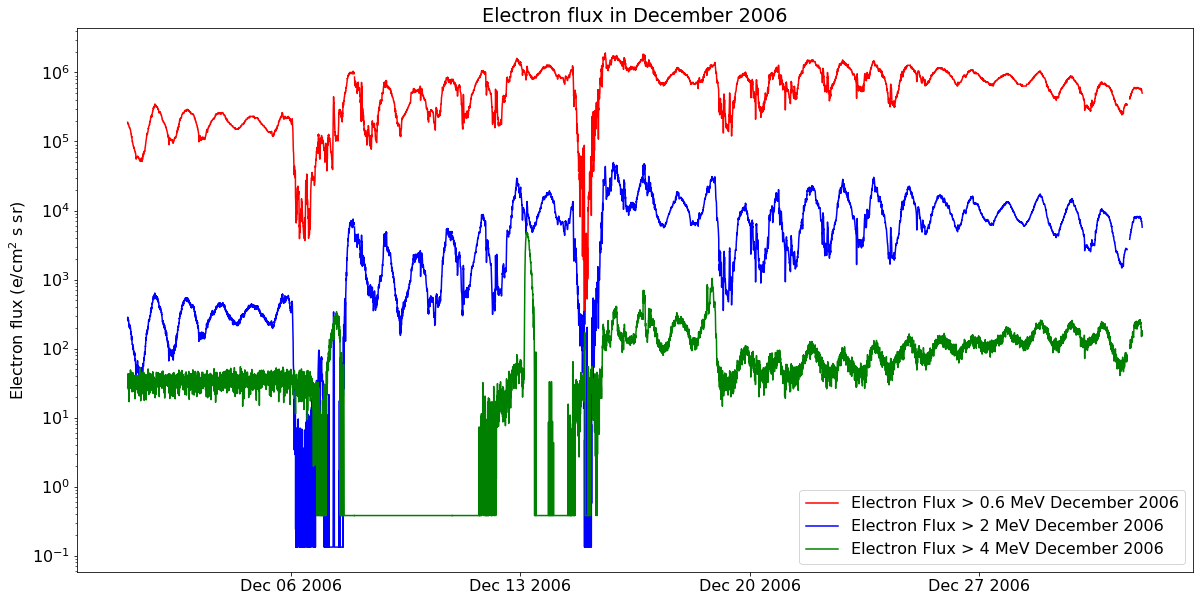

In [71]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
e2006 = plt.semilogy(Time06,elec1,color='r',label="Electron Flux > 0.6 MeV December 2006")
e22006 = plt.semilogy(Time06,elec2,color='b',label="Electron Flux > 2 MeV December 2006")
e32006 = plt.semilogy(Time06,elec3,color='g',label="Electron Flux > 4 MeV December 2006")
ax.set_title('Electron flux in December 2006')
ax.set_ylabel('Electron flux (e/cm$^2$ s sr)')
plt.legend(handles=[e2006[0],e22006[0],e32006[0]])

In [ ]:
#This part is to style our plots. It will create the x-ticks. 
labelx = [1,2304,4320,6336,8640]
labels = ['Day 1', 'Day 8', 'Day 15', 'Day 22', 'Day 30']

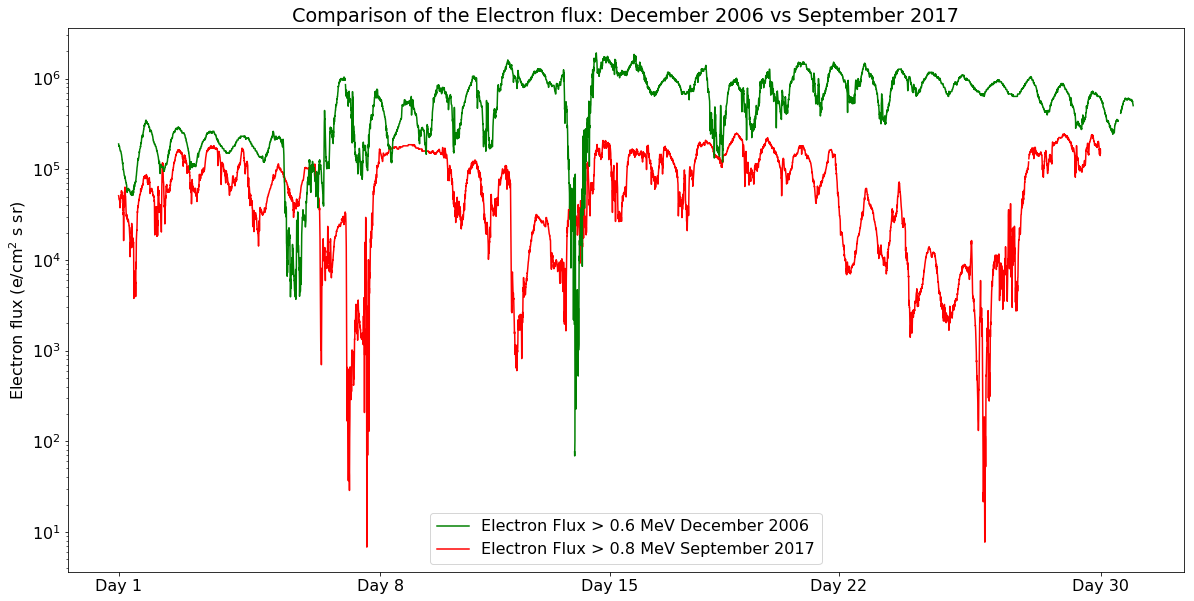

In [72]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
e2017 = plt.semilogy(AvgE1,color='r',label="Electron Flux > 0.8 MeV September 2017")
e2006 = plt.semilogy(elec1,color='g',label="Electron Flux > 0.6 MeV December 2006")
ax.set_title('Comparison of the Electron flux: December 2006 vs September 2017')
ax.set_ylabel('Electron flux (e/cm$^2$ s sr)')
plt.xticks(labelx,labels)
plt.legend(handles=[e2006[0],e2017[0]])

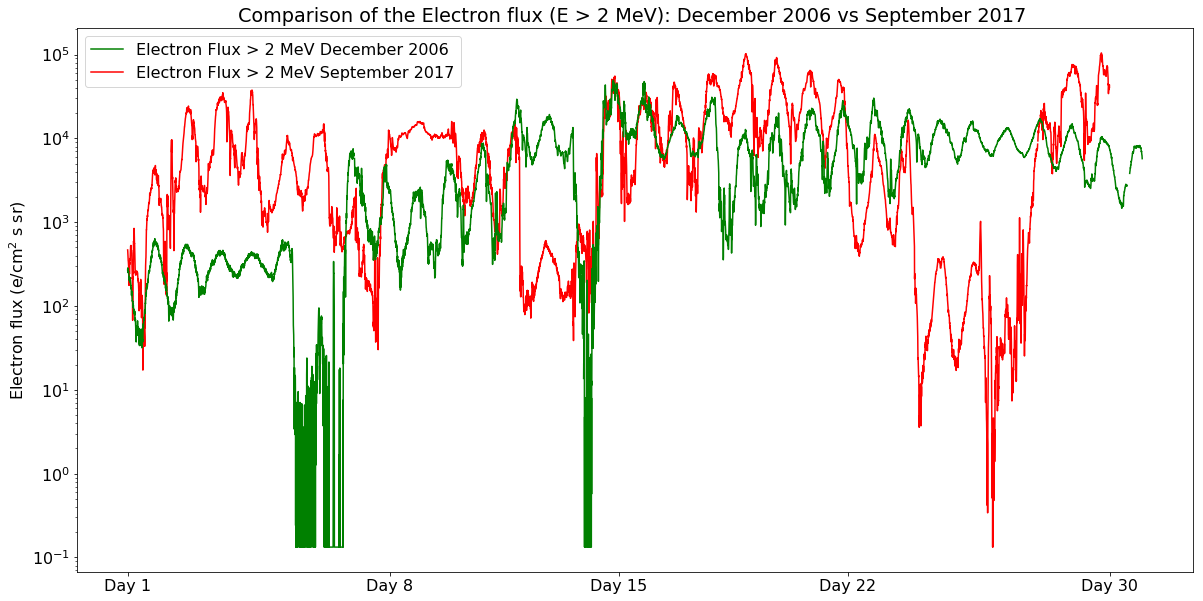

In [73]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
e22017 = plt.semilogy(AvgE2,color='r',label="Electron Flux > 2 MeV September 2017")
e22006 = plt.semilogy(elec2,color='g',label="Electron Flux > 2 MeV December 2006")
ax.set_title('Comparison of the Electron flux (E > 2 MeV): December 2006 vs September 2017 ')
ax.set_ylabel('Electron flux (e/cm$^2$ s sr)')
plt.xticks(labelx,labels)
plt.legend(handles=[e22006[0],e22017[0]])